Ref : https://www.viralml.com/static/code/Predict-Stock-Market-With-Markov-Chains-and-Python.html
https://youtu.be/sdp49vTanSk

In [80]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import json
import requests
from urllib.request import urlopen
from random import randint

In [81]:
df = yf.download("^GSPC")

"""
Option 2:
"""
# response = urlopen("https://fmpcloud.io/api/v3/historical-chart/1hour/AAPL?apikey=e72105fd77c6f3f40e1a5fc705c8d306")
# json_data = response.read().decode('utf-8', 'replace')

# df = json.loads(json_data)
# df = pd.json_normalize(df)

[*********************100%***********************]  1 of 1 completed


'\nOption 2:\n'

In [82]:
# csv_data = df.to_csv('AAPL_1hr.csv', index = True)

In [83]:
df['Date'] = pd.to_datetime(df.index)

In [84]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927-12-30
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928-01-03
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928-01-04
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928-01-05
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928-01-06


In [85]:
new_set = []
for row_set in range(0, 1000000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(df)-row_quant)
    market_subset = df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
1982-11-30 00:00:00
2000
1980-02-13 00:00:00
4000
1953-12-02 00:00:00
6000
1954-05-19 00:00:00
8000
1949-04-12 00:00:00
10000
1980-06-05 00:00:00
12000
2011-01-07 00:00:00
14000
1963-09-26 00:00:00
16000
1943-12-07 00:00:00
18000
1977-04-04 00:00:00
20000
1964-06-29 00:00:00
22000
2012-10-08 00:00:00
24000
2004-04-15 00:00:00
26000
1938-06-16 00:00:00
28000
1938-01-19 00:00:00
30000
1983-03-11 00:00:00
32000
1963-05-17 00:00:00
34000
1962-03-02 00:00:00
36000
1933-02-28 00:00:00
38000
1977-12-19 00:00:00
40000
2012-03-22 00:00:00
42000
1949-11-17 00:00:00
44000
1991-04-16 00:00:00
46000
1996-06-17 00:00:00
48000
1994-01-24 00:00:00
50000
2006-03-31 00:00:00
52000
2011-03-28 00:00:00
54000
1988-09-06 00:00:00
56000
2001-01-18 00:00:00
58000
2020-08-14 00:00:00
60000
2007-12-12 00:00:00
62000
1953-01-21 00:00:00
64000
1939-09-21 00:00:00
66000
2020-09-24 00:00:00
68000
1970-08-24 00:00:00
70000
1965-12-10 00:00:00
72000
2018-03-14 00:00:00
74000
1935-07-17 00:00:00
76000
2020-05-26 00:

In [86]:
len(market_subset)

24

In [87]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)

(19987533, 8)
(13762499, 8)


In [88]:
new_set_df.tail(5)

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
Date,,,,,,,,
1986-08-19,999999,1986-08-26,-0.003517,-0.001654,0.001385,-0.031028,-0.003517,47300000.0
1986-08-20,999999,1986-08-26,0.013225,0.009498,0.002807,0.432754,0.013142,-21400000.0
1986-08-21,999999,1986-08-26,-0.000400,0.002722,0.010547,-0.136654,-0.000400,-17100000.0
1986-08-22,999999,1986-08-26,0.002083,0.000639,0.000642,-0.126479,0.002083,-13700000.0
1986-08-25,999999,1986-08-26,-0.009513,-0.001397,-0.006058,-0.116003,-0.009513,52200000.0


In [89]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
Date,,,,,,,,
1982-11-15,0,1982-11-30,-0.017917,-0.016285,-0.018132,-0.170172,-0.017988,24010000.0
1982-11-16,0,1982-11-30,-0.011749,-0.018418,-0.021533,0.304309,-0.011316,-18470000.0
1982-11-17,0,1982-11-30,0.018535,0.007009,0.010593,-0.179477,0.018159,-6820000.0
1982-11-18,0,1982-11-30,0.002973,0.006163,0.014763,-0.080767,0.002973,-7310000.0
1982-11-19,0,1982-11-30,-0.009542,0.001081,-0.003419,-0.094177,-0.009613,4650000.0


In [90]:
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

In [91]:
new_set_df.tail()

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
Date,,,,,,,
1986-08-19,999999,1986-08-26,L,M,L,47300000.0,LML
1986-08-20,999999,1986-08-26,H,H,H,-21400000.0,HHH
1986-08-21,999999,1986-08-26,M,L,M,-17100000.0,MLM
1986-08-22,999999,1986-08-26,M,L,H,-13700000.0,MLH
1986-08-25,999999,1986-08-26,L,L,L,52200000.0,LLL


In [92]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.376250e+07
mean     2.939408e+05
std      3.451999e+08
min     -4.995080e+09
25%     -8.000000e+06
50%      0.000000e+00
75%      8.180000e+06
max      4.637230e+09
Name: Outcome_Next_Day_Direction, dtype: float64

In [93]:
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(
                                        lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head()

(765668, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,1982-11-30,"{LLL, LHL, HLH, MLH, LLL, LHL, LML, HLH, HLH, ..."
1,1,2018-05-01,"{HLH, LML, LML, HLH, LML, HMH, HMH, HMH, LML, ..."
2,2,1985-10-14,"{LLL, HHH, HMH, HHH, LHL, MLM, LLL, LML, MMM, ..."
3,5,1950-09-18,"{HMM, LMM, MMM, HHM, LMM, HLM, HHM, HLM, HMM}"
4,7,1987-09-25,"{LLL, LLL, LML, HMH, LHL, LML, LLL, LLL, LHL, ..."


In [94]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(765668, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,765668.000000,7.656680e+05
mean,500045.035368,2.772752e+05
std,288619.197392,3.480417e+07
min,0.000000,-6.635312e+08
25%,250253.750000,-6.387500e+05
50%,500083.500000,2.352941e+03
75%,749856.250000,8.045455e+05
max,999999.000000,8.148188e+08


In [95]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(765668, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,1982-11-30,"{LLL, LHL, HLH, MLH, LLL, LHL, LML, HLH, HLH, ...",1.457000e+06
1,1,2018-05-01,"{HLH, LML, LML, HLH, LML, HMH, HMH, HMH, LML, ...",1.950000e+06
2,2,1985-10-14,"{LLL, HHH, HMH, HHH, LHL, MLM, LLL, LML, MMM, ...",-1.131667e+06
3,5,1950-09-18,"{HMM, LMM, MMM, HHM, LMM, HLM, HHM, HLM, HMM}",8.777778e+04
4,7,1987-09-25,"{LLL, LLL, LML, HMH, LHL, LML, LLL, LLL, LHL, ...",-2.771429e+06


In [96]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,1982-11-30,"LLL,LHL,HLH,MLH,LLL,LHL,LML,HLH,HLH,LHL",1.457000e+06
1,1,2018-05-01,"HLH,LML,LML,HLH,LML,HMH,HMH,HMH,LML,HLL,HHH,LL...",1.950000e+06
2,2,1985-10-14,"LLL,HHH,HMH,HHH,LHL,MLM,LLL,LML,MMM,HMH,MLM,HMH",-1.131667e+06
3,5,1950-09-18,"HMM,LMM,MMM,HHM,LMM,HLM,HHM,HLM,HMM",8.777778e+04
4,7,1987-09-25,"LLL,LLL,LML,HMH,LHL,LML,LLL,LLL,LHL,MLM,HHH,HM...",-2.771429e+06


In [97]:
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(2707, 4)

In [98]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(762961, 4)

In [99]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [100]:
compressed_set = compressed_set[['Sequence_ID', 
                                 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 
                                                       'Event_Pattern','Outcome_Next_Day_Direction']]

In [101]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    7.629610e+05
mean     2.656192e+05
std      3.446037e+07
min     -6.635312e+08
25%     -6.300000e+05
50%      2.307692e+03
75%      7.866667e+05
max      8.148188e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [102]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

762961


171327

In [103]:
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] 
                                                         > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where(
                                (compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))

all moves: 762961
big moves only: 171327


In [104]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
29,40,"HLH,LML,MHM,MHL,MLM,MHH,MLM,LHL,MMH,MMM,HMH,MLL",1
31,44,"HHH,HMH,LLL,LML,HMH,HHH,HMH,HLH,LML",0
36,50,"LLL,HLH,LHL,LLL,HMH,MMM,HMH,HLH,MMM,MMM,MMM,HM...",0
38,52,"HLH,HMH,LML,LHL,HHH,MLH,HLH,LLL,HMH,HMH,HHH,LL...",1
40,55,"HMH,MLM,LHL,MMM,HMH,LLL,HHH,HHH,LLL,LLL",0


In [105]:
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][
                                                    ['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][
                                                    ['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(86475, 2)
(84852, 2)


In [106]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [107]:
compressed_set['Outcome_Next_Day_Direction'].head()

29    1
31    0
36    0
38    1
40    0
Name: Outcome_Next_Day_Direction, dtype: int32

In [108]:
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
#     del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [109]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns)

C:\Users\lucki\WORK\Anaconda3\envs\z-m\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


In [110]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.078436,0.0,0.000000,0.126858,0.291726,0.212031,0.092389,0.000000,0.066565,0.0,...,0.122531,0.031153,0.065493,0.059187,0.159184,0.185786,0.191155,0.059214,0.066402,0.118506
HHL,0.001351,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HHM,0.000000,0.0,0.000000,0.002284,0.000000,0.156703,0.005354,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.007114,0.020153,0.000000,0.004803,0.000000,0.000000,0.001232
HLH,0.138995,0.0,0.201207,0.086516,0.000000,0.070182,0.099251,0.369298,0.087008,0.0,...,0.009767,0.148791,0.110970,0.165151,0.130829,0.083907,0.094581,0.101623,0.156720,0.119034
HLL,0.001969,0.0,0.000000,0.000000,0.000000,0.000000,0.003200,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000


In [111]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.064811,0.0,0.00000,0.108774,0.140749,0.195586,0.109378,0.000000,0.020485,0.0,...,0.085639,0.058013,0.084422,0.049139,0.183680,0.173654,0.163159,0.066509,0.072087,0.135538
HHL,0.003104,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HHM,0.000000,0.0,0.00000,0.002232,0.000000,0.036880,0.003314,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.003540,0.014968,0.000000,0.001288,0.000000,0.000000,0.004673
HLH,0.125746,0.0,0.15624,0.065260,0.000000,0.098247,0.099896,0.313725,0.010964,0.0,...,0.136900,0.137337,0.089924,0.139060,0.076448,0.081438,0.078128,0.061700,0.146155,0.090399
HLL,0.001035,0.0,0.00000,0.000000,0.000000,0.000000,0.000862,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.003727,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
1.1243207618127833
0.83908938109876
outcome: 1
0.9745682300711361
-3.7222987370846057
outcome: 0
0.9028249632677142
-0.6342901076424887
outcome: 0
1.1439760076763625
0.6420353618844401
outcome: 0
1.1022647426608236
0.6971598452450203
outcome: 1
0.9895422185419565
-0.06815323332354147
outcome: 1
0.9556879154893352
-1.931302263018543
outcome: 0
1.0401805002111566
-2.2773608621975905
outcome: 1
1.0005887469910177
0.4798941389940553
outcome: 1
0.9895360677969303
0.16461509217956322
outcome: 1
0.9835377717401419
-1.678494853761036
outcome: 0
1.0366734199822956
0.06843893564797374
outcome: 0
0.9872541855024178
0.2126025764193205
outcome: 0
1.0461414692158657
1.1287848385345194
outcome: 1
0.9936268489837671
0.3293460969541125
outcome: 0
1.2380797983570444
1.4515867646523417
outcome: 1
1.0176629091979439
0.42370152516262205
outcome: 0
0.9243761082908662
-2.201269536732527
outcome: 1
1.0160958720582605
1.0113428269633484
outcome: 1
0.7829534938131034
-3.4199354647409987
outcome: 1
0.

array([[473, 741],
       [925, 568]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 38.46 %


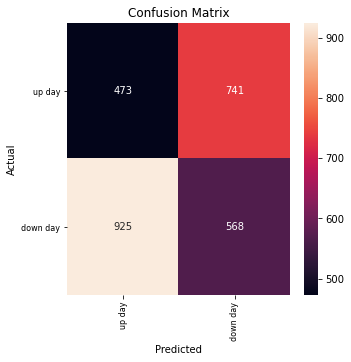

In [114]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()